# Dates - General Covid-19 dataset

In order to create the bar and area charts, we need the following packages:

In [1]:
import pandas as pd
import json
from collections import Counter
import altair as alt
from dateutil.parser import parse

To read the JSON file that has all the tweets, it is necessary to do:

In [2]:
data = []
with open('dataset/general_result_translated_full.json', 'r') as f:
    for line in f:
        data.append(json.loads(line))

## Bar chart: "Number of tweets per day of the week"

We're interested in the "created_at" field:

In [3]:
index = 0
new = []
for element in data:
    token = data[index]['created_at']
    new.append(token[0:3])
    index = index + 1

#print(new)
#print(len(new))

count = Counter(new)
#print(count)

The bar chart is created:

In [4]:
df = pd.DataFrame.from_dict(count, orient='index').reset_index()
df = df.rename(columns={'index':'Day',0:'Tweet count'})

#range=['#acdbf3','#a5d8f2','#9ed5f1','#97d2f0','#90cfef','#89ccee','#82c9ed','#7ac6ec','#73c3eb','#6cc0ea','#65bde9','#5ebae8','#57b7e7','#50b4e6','#48b0e4','#41ade3','#3aaae2','#33a7e1','#2ca4e0','#25a1df','#1f9edd','#1e99d6','#1d93cf','#1c8ec7','#1b89c0','#1a84b9','#197fb2','#187aab','#1775a4','#16709d','#156b95','#14668e','#136087','#125b80','#115679','#105172','#0f4c6b','#0e4763','#0d425c','#0c3d55','#0b384e','#0a3347','#092d40','#082839']
chart = alt.Chart(
    df
).mark_bar().encode(
    x = alt.X('Tweet count:Q'),
    y = alt.Y('Day', sort = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']),
    color=alt.Color('Tweet count:Q',scale=alt.Scale(scheme="oranges")),
    tooltip=[
        alt.Tooltip('Day', title='Day'),
        alt.Tooltip('Tweet count:Q', title='Tweet count')
    ]
).transform_window(
    rank='rank(count)',
    sort=[alt.SortField('count', order='descending')]
).properties(
    width=700,
    height=300,
    title = "Number of tweets per day of the week"
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
).configure_legend(
    gradientThickness=20,
    titleFontSize=15,
    labelFontSize=13,
    titlePadding=10
)

chart

alt.Chart(...)

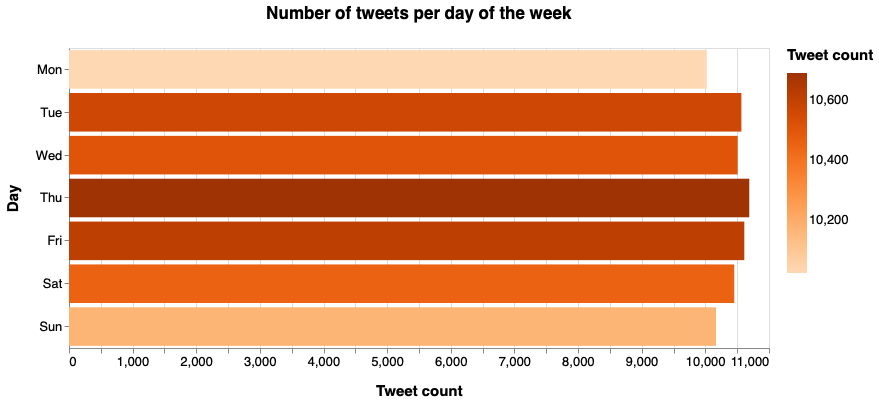

## Area chart: "Trend of the number of Tweets during the year"

We're interested in the "created_at" field:

In [5]:
index = 0
new = []
for element in data:
    token = data[index]['created_at']
    d = parse(token)
    d = d.strftime('%Y/%m/%d')
    new.append(d)
    index = index + 1

#print(new)
#print(len(new))

count = Counter(new)
#print(count)

The area chart is created:

In [6]:
df = pd.DataFrame.from_dict(count, orient='index').reset_index()
df = df.rename(columns={'index':'Month',0:'Tweet count'})
df['Month']= pd.to_datetime(df['Month'])

# Create a selection that chooses the nearest point & selects based on x-value
nearest = alt.selection(type='single', nearest=True, on='mouseover',
                        fields=['Month'], empty='none')


chart = alt.Chart(df).mark_area(
    #point= True,
    line={'color':'#126DC5'},
    color=alt.Gradient(
        gradient='linear',
        stops=[alt.GradientStop(color='white', offset=0),
               alt.GradientStop(color='mediumturquoise', offset=1)],
        x1=1,
        x2=1,
        y1=1,
        y2=0
    )
).properties(
    width=700,
    height=300,
    title = "Trend of the number of Tweets during the year"
).encode(
        #alt.X('Month', sort = ['Jan','Feb','Mar','Apr','May','Jun','Jul']),
        alt.X('Month'),
        alt.Y('Tweet count:Q')
        #tooltip=['Month', 'Tweet count']
)

# Transparent selectors across the chart. This is what tells us
# the x-value of the cursor
selectors = alt.Chart(df).mark_point().encode(
    #x=alt.X('Month', sort = ['Jan','Feb','Mar','Apr','May','Jun','Jul']),
    x=alt.X('Month'),
    opacity=alt.value(0),
).add_selection(
    nearest
)

# Draw points on the line, and highlight based on selection
points = chart.mark_point().encode(
    opacity=alt.condition(nearest, alt.value(1), alt.value(0))
)

# Draw text labels near the points, and highlight based on selection
text = chart.mark_text(align='left', dx=5, dy=-5).encode(
    text=alt.condition(nearest, 'Tweet count:Q', alt.value(' '))
)

# Draw a rule at the location of the selection
rules = alt.Chart(df).mark_rule(color='gray').encode(
    #x=alt.X('Month', sort = ['Jan','Feb','Mar','Apr','May','Jun','Jul']),
    x=alt.X('Month'),
).transform_filter(
    nearest
)

# Put the five layers into a chart and bind the data
alt.layer(
    chart, selectors, points, rules, text
).properties(
    width=700,
    height=300
).configure_title(
    fontSize=17,
    offset=25
).configure_axis(
    labelFontSize=13,
    titleFontSize=15,
    titlePadding=15
)

alt.LayerChart(...)

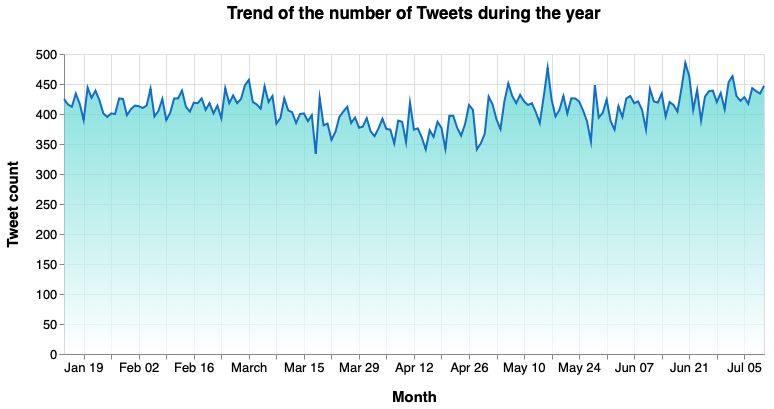